## Computer vision
### Image matching

In [2]:
import numpy as np
import cv2 as cv
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
base_folder = './' # change this on your machine
images = glob.glob(os.path.join(base_folder, "*.jpg")) 
print(images)

['./test_image_math.jpg', './cathedral_img1.jpg', './cathedral_img2.jpg', './template_math.jpg']


In [4]:
print(cv.__version__)
# sift doesn't work with version 4.1.2 (is patented)
# in order to make sift working uninstall opencv and install version 3.4.2.16 with opencv-contrib
# pip install opencv-python==3.4.2.16
# pip install opencv-contrib-python==3.4.2.16

4.2.0


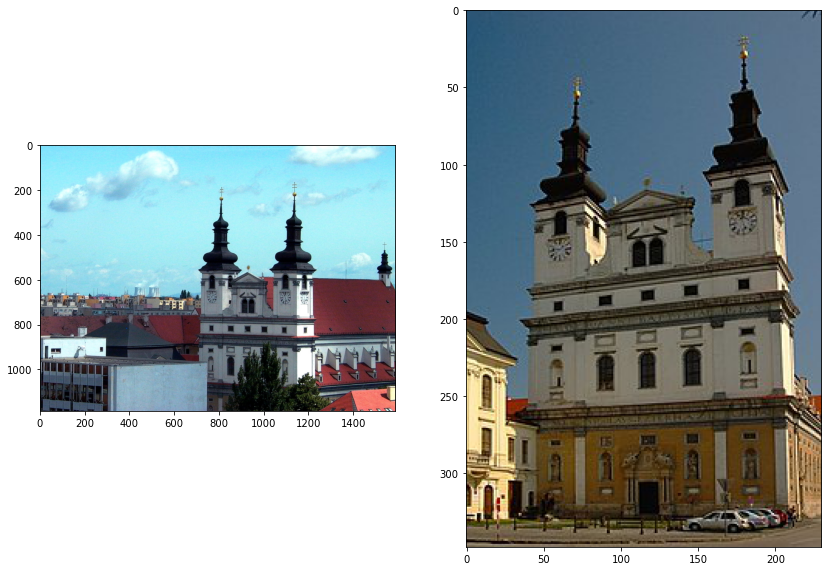

(1187, 1586, 3)
(348, 230, 3)


In [6]:
img1 = cv.imread(base_folder + 'cathedral_img1.jpg')
img2 = cv.imread(base_folder + 'cathedral_img2.jpg')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

print(img1.shape)
print(img2.shape)

We will perform **image matching** based on their local features, a.k.a. interest points.

A local image feature is a tiny patch in the image that's invariant to image scaling, rotation and change in illumination. It's like the tip of a tower, or the corner of a window in the image above. Unlike a random point on the background (sky) in the image above, the tip of the tower can be precise detected in most images of the same scene. It is geometricly (translation, rotation, ...) and photometricly (brightness, exposure, ...) invariant.

In [22]:
# create ORB object
orb = cv.ORB_create(nfeatures=5000)
# get the keypoints and the corresponding descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
print('(1) num of keypoints =', len(kp1))
print('(1) num of descriptors =', len(des1))
print('(1) the dimension of one descriptor is', len(des1[1]))
print('(1) the second descriptor is', des1[1])
kp2, des2 = orb.detectAndCompute(img2, None) 
print('(2) num of keypoints =', len(kp2))
print('(2) num of descriptors =', len(des2))

(1) num of keypoints = 5000
(1) num of descriptors = 5000
(1) the dimension of one descriptor is 32
(1) the second descriptor is [ 33  29 243  69 116 110 111 119 113 226 126  64  17  55 149 116 124 252
  50 168 225 178 241 202 101 188 134   0  67 248 102 248]
(2) num of keypoints = 1926
(2) num of descriptors = 1926


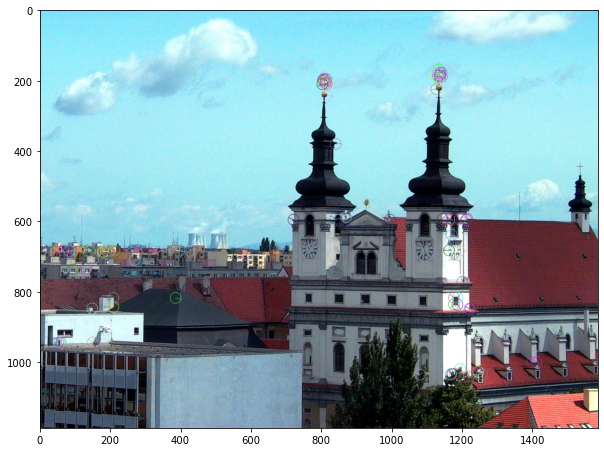

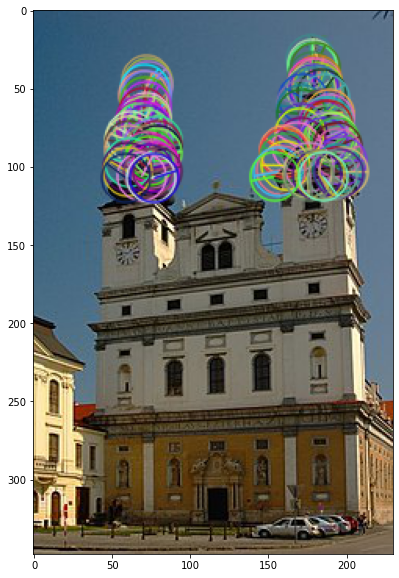

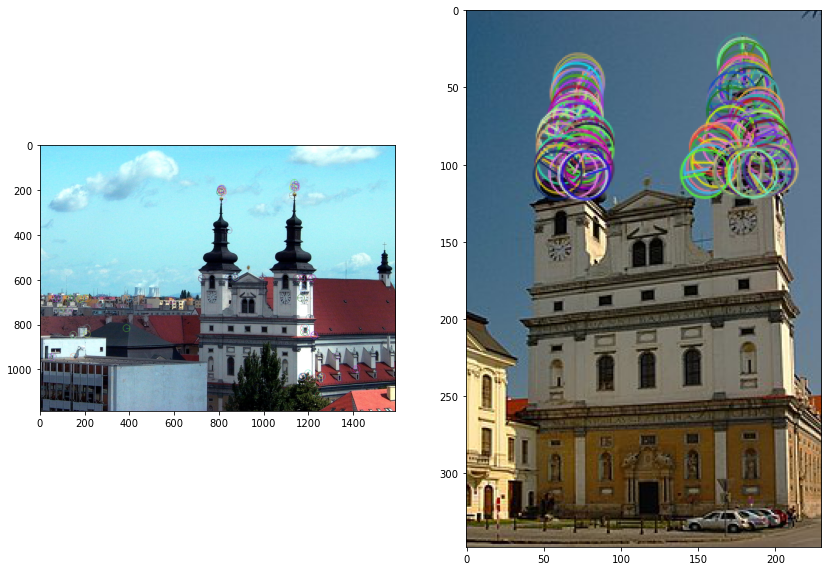

In [24]:
# drawing keypoints
drawing_img1 = np.copy(img1)
cv.drawKeypoints(img1, kp1[:100], drawing_img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(drawing_img1)
plt.show()
# drawing keypoints
drawing_img2 = np.copy(img2)
cv.drawKeypoints(img2, kp2[:100], drawing_img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(drawing_img2)
plt.show()

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(drawing_img1)
plt.subplot(1, 2, 2)
plt.imshow(drawing_img2)
plt.show()

621


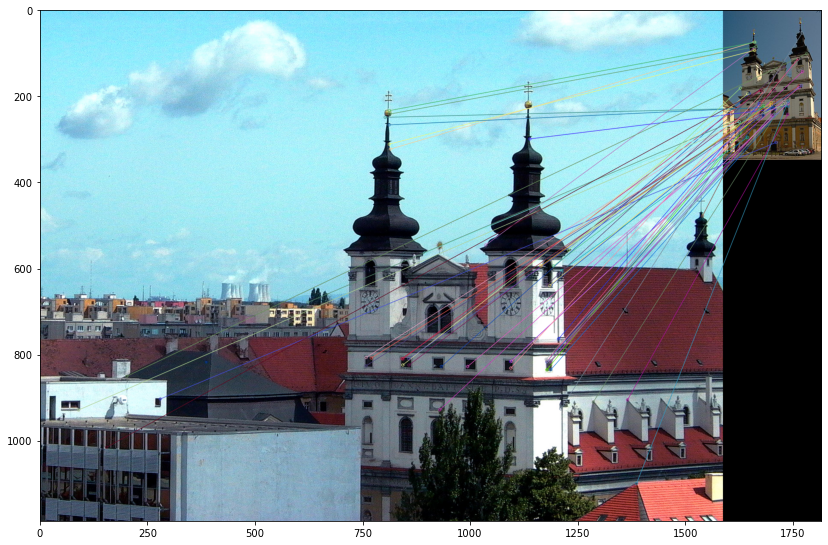

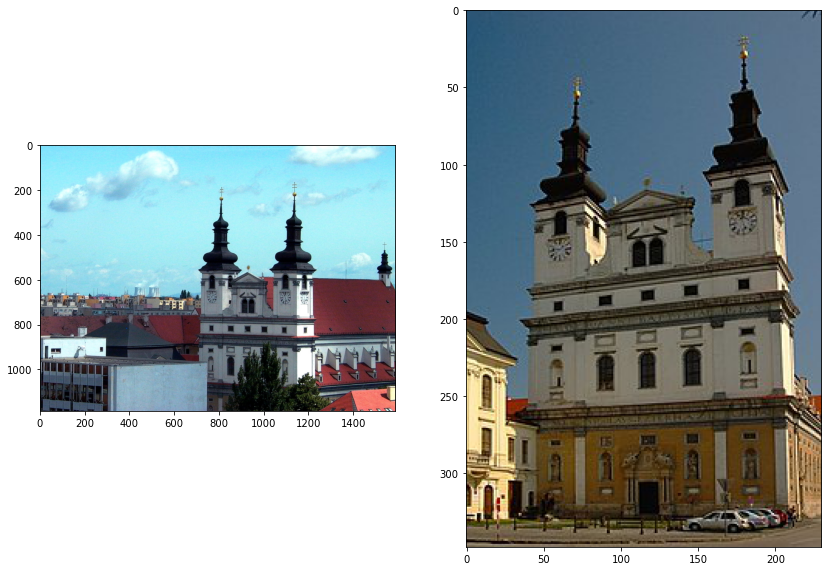

In [31]:
# help here: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html

# create BFMatcher object
# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1, des2) # query_image, train_image
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

print(len(matches))
# Draw first 50 matches.
plt.figure(figsize=(14, 14))
img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

plt.figure(figsize=(14, 14))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()


In [26]:
# Initiate SIFT detector
# sift = cv.xfeatures2d.SIFT_create()

error: OpenCV(4.2.0) ../opencv_contrib/modules/xfeatures2d/src/sift.cpp:1210: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


###  Project 1 - Automatic grading of multiple choice tests

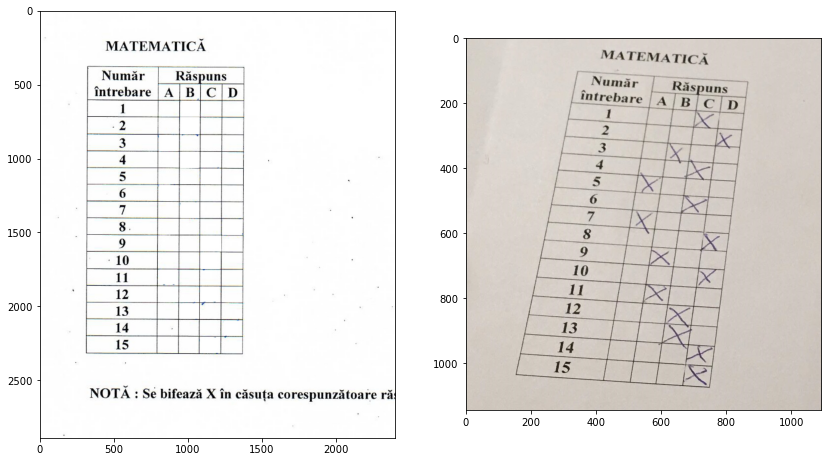

the shape of img_template is (2889, 2401, 3)
the shape of img_query is (1146, 1092, 3)


In [32]:
img_template = cv.imread(base_folder + 'template_math.jpg')
img_query = cv.imread(base_folder + 'test_image_math.jpg')
img_template = cv.cvtColor(img_template, cv.COLOR_BGR2RGB)
img_query = cv.cvtColor(img_query, cv.COLOR_BGR2RGB)
plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img_template)
plt.subplot(1, 2, 2)
plt.imshow(img_query)
plt.show()

print('the shape of img_template is', img_template.shape)
print('the shape of img_query is', img_query.shape)

In [11]:
points_template = np.float32([(322, 384), (1373, 382), (314, 2304), (1369, 2324)]) # the points of the 4 corners (table) in the template image
points_query = np.float32([(345, 105), (862, 138), (154, 1035), (747, 1075)]) # the points of the 4 corners (table) in the test image

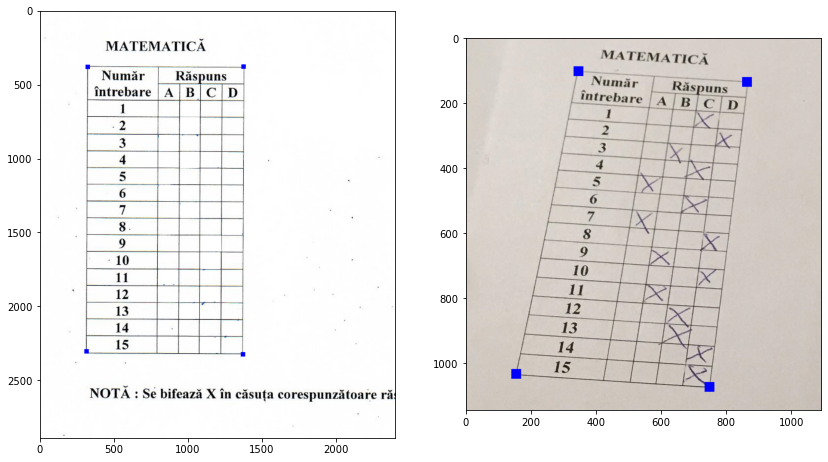

In [12]:
# use it only for plotting the points in the images
img_template_with_points = img_template.copy()
img_query_with_points = img_query.copy()
step = 15
for i in range(len(points_template)): 
    img_template_with_points[int(points_template[i, 1] - step):int(points_template[i, 1] + step), int(points_template[i, 0] - step):int(points_template[i, 0] + step)] = [0, 0, 255]
    img_query_with_points[int(points_query[i, 1] - step):int(points_query[i, 1] + step), int(points_query[i, 0] - step):int(points_query[i, 0] + step)] = [0, 0, 255]

plt.figure(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(img_template_with_points) 
plt.subplot(1, 2, 2)
plt.imshow(img_query_with_points)
plt.show()


In [33]:
# find the homography given the 8 points
homography = cv.getPerspectiveTransform(points_query, points_template) # first param - the points from the test image
                                                          # the second param - the points from the template image


In [41]:
print(homography)
print(points_query)
print(points_template)
H = homography
w1 = [[points_query[0][0]], [points_query[0][1]], [1]]
w2 = [[points_template[0][0]], [points_template[0][1]], [1]]
w = np.dot(H, w1)
print(w)
print(w2)
      

[[ 1.99173812e+00  4.49014877e-01 -4.10327184e+02]
 [-1.64025648e-01  2.40016081e+00  1.90920122e+02]
 [-2.76654946e-05  1.49138979e-04  1.00000000e+00]]
[[ 345.  105.]
 [ 862.  138.]
 [ 154. 1035.]
 [ 747. 1075.]]
[[ 322.  384.]
 [1373.  382.]
 [ 314. 2304.]
 [1369. 2324.]]
[[323.96902909]
 [386.34815892]
 [  1.006115  ]]
[[322.0], [384.0], [1]]


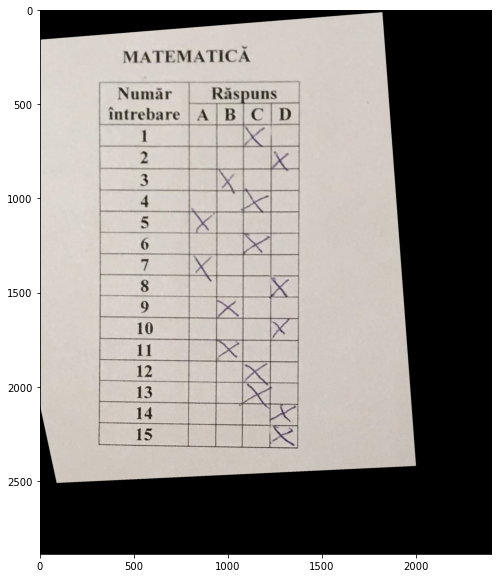

In [34]:
# use homography to get the aligned image 
height, width, _ = img_template.shape # the shape with respect to the template image
aligned_image2 = cv.warpPerspective(img_query, homography, (width, height), flags=cv.INTER_NEAREST)
plt.figure(figsize=(10, 10))
plt.imshow(aligned_image2); 
plt.show()

In [42]:
# TODO: find the homography using ORB features
img1 = img_template
img2 = img_query
# create ORB object
orb = cv.ORB_create(nfeatures=5000)
# get the keypoints and the corresponding descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
print('(1) num of keypoints =', len(kp1))
print('(1) num of descriptors =', len(des1))
print('(1) the dimension of one descriptor is', len(des1[1]))
print('(1) the second descriptor is', des1[1])
kp2, des2 = orb.detectAndCompute(img2, None) 
print('(2) num of keypoints =', len(kp2))
print('(2) num of descriptors =', len(des2))

(1) num of keypoints = 5000
(1) num of descriptors = 5000
(1) the dimension of one descriptor is 32
(1) the second descriptor is [ 67 146  70 149 114 138 168  99 188 193  82 231 237 166 166 193 182  45
 127 133 133 217 151  77 148  34 122 128  13   4  41 157]
(2) num of keypoints = 5000
(2) num of descriptors = 5000


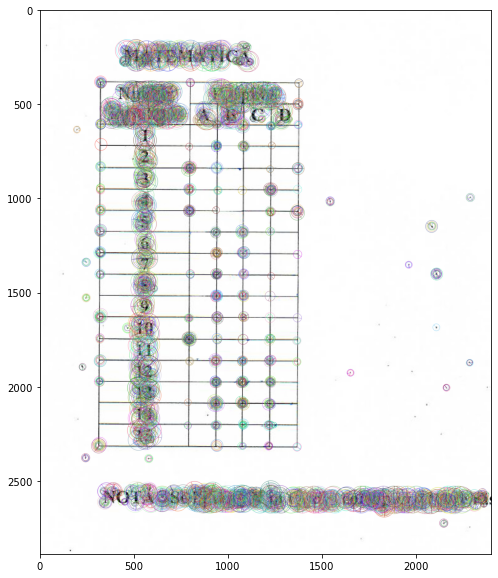

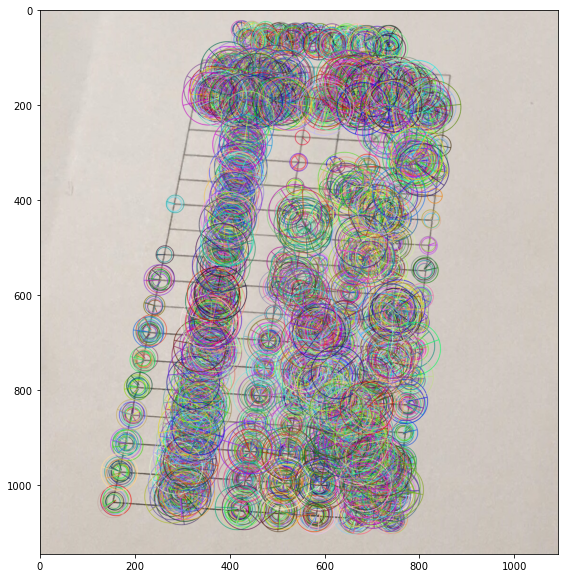

In [48]:
# drawing keypoints
drawing_img1 = np.copy(img1)
cv.drawKeypoints(img1, kp1[:5000], drawing_img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(drawing_img1)
plt.show()
# drawing keypoints
drawing_img2 = np.copy(img2)
cv.drawKeypoints(img2, kp2[:5000], drawing_img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(drawing_img2)
plt.show()


1117


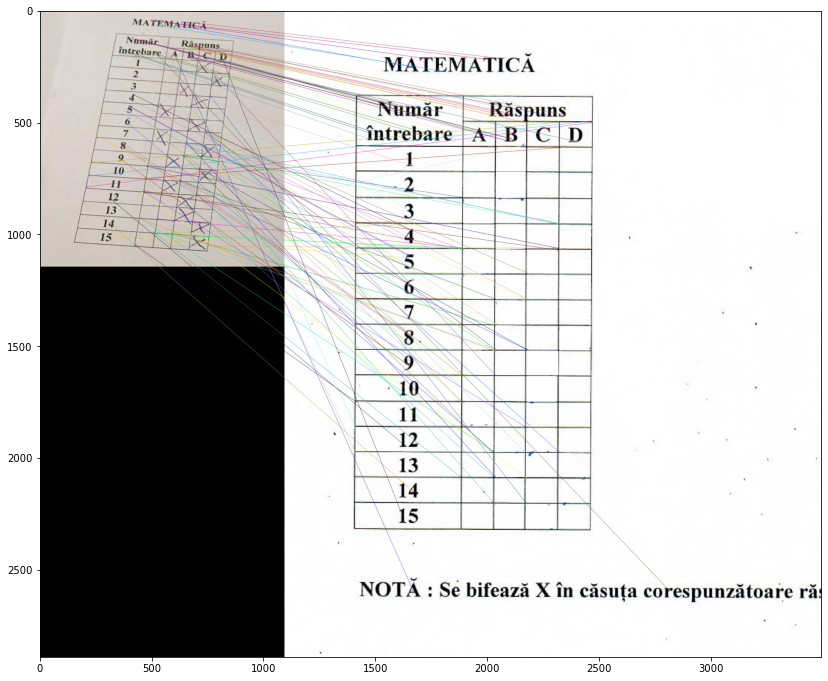

In [57]:
# create BFMatcher object
# matcher takes normType, which is set to cv2.NORM_L2 for SIFT and SURF, cv2.NORM_HAMMING for ORB, FAST and BRIEF
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des2, des1) # query_image, train_image
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

print(len(matches))
# Draw first 50 matches.
plt.figure(figsize=(14, 14))
img3 = cv.drawMatches(img2, kp2, img1, kp1, matches[:100], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3)
plt.show()

In [61]:
# points template from img1, the template image
print(len(matches))
points_template = np.zeros((len(matches), 2), dtype=np.float32)
# points_query from img2, the query image
points_query = np.zeros((len(matches), 2), dtype=np.float32)

for i,m in enumerate(matches):
    points_template[i,:] = kp1[m.trainIdx].pt
    points_query[i,:] = kp2[m.queryIdx].pt
    
print(points_template.shape)
print(points_template)
print(points_query.shape)
print(points_query)



1117
(1117, 2)
[[ 880.86554  582.267  ]
 [ 941.76    1401.12   ]
 [ 570.24005  252.97923]
 ...
 [2352.      2584.     ]
 [1781.6376  2587.8535 ]
 [ 623.52     444.96002]]
(1117, 2)
[[606.24005 207.36002]
 [733.      547.     ]
 [615.       69.     ]
 ...
 [684.28815 980.3983 ]
 [658.08    943.2    ]
 [680.80457 189.90865]]


In [70]:
H,mask = cv.findHomography(points_query, points_template, cv.RANSAC)

print(H)
print('number of inliers = ', sum(mask))


[[ 2.07346847e+00  4.77399619e-01 -4.34791817e+02]
 [-1.33632423e-01  2.49086903e+00  1.71933080e+02]
 [ 9.20929954e-06  1.97187584e-04  1.00000000e+00]]
number of inliers =  [145]


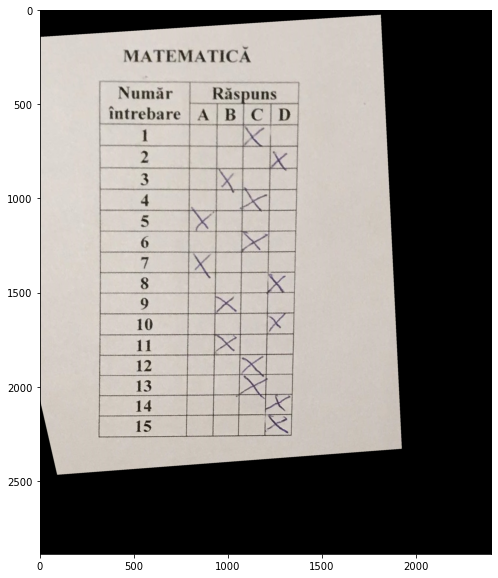

In [71]:
# use homography to get the aligned image 
height, width, _ = img_template.shape # the shape with respect to the template image
aligned_image2 = cv.warpPerspective(img_query, H, (width, height), flags=cv.INTER_NEAREST)
plt.figure(figsize=(10, 10))
plt.imshow(aligned_image2); 
plt.show()

In [73]:
print(homography)
print("\n\n")
print(H)

[[ 1.99173812e+00  4.49014877e-01 -4.10327184e+02]
 [-1.64025648e-01  2.40016081e+00  1.90920122e+02]
 [-2.76654946e-05  1.49138979e-04  1.00000000e+00]]



[[ 2.07346847e+00  4.77399619e-01 -4.34791817e+02]
 [-1.33632423e-01  2.49086903e+00  1.71933080e+02]
 [ 9.20929954e-06  1.97187584e-04  1.00000000e+00]]
